# Classfication

## DecisionTree

### Characteristic of DT

In [ ]:
'''
Pros:
Easy and Intuitive to understand Algorithm
Significant Rule of Algorithm -> Visualization
No need to make particular preprocessing(Scaling, Regularization)

Cons:
OVERFITTING
->Hyperparameter(ex. max_depth...) Tuning!
'''

### Parameters of DecisionTree

In [ ]:
'''
min_samples_split: # of minimum sample data to split nodes. Default=2
min_samples_leaf: # of minimum sample data to be leaf. Default=1
max_features: # of feature to consider. Default=None. 
              if max_feature=int, it means # of feature. if max_feature=float, it means % of feature
              if max_feature=sqrt, it means sqrt(# of feature).(=auto do same job)
              if max_feature=log, it means log2(# of feature)
max_depth: Maximum depth of DT. Default=None
max_leaf_nodes: Max # of leaf
'''

### DT Visualization by Grapviz!

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dt_clf = DecisionTreeClassifier(random_state=156)

iris_data = load_iris()
X_train, X_test, Y_train, Y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

dt_clf.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=156)

In [3]:
from sklearn.tree import export_graphviz

#make tree.dot file and export by graphviz
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names, 
                feature_names=iris_data.feature_names, impurity=True, filled=True)

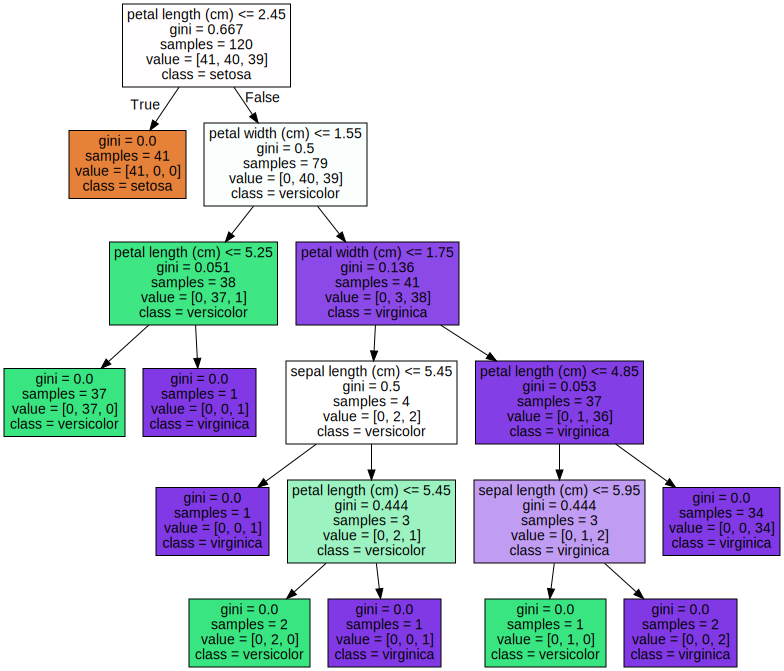

In [4]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [7]:
#Lets control parameters!
def parameter_test(max_depth=None, min_samples_split=2, min_samples_leaf=1):
    dt_clf1 = DecisionTreeClassifier(max_depth = max_depth, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf, random_state=156)

    X_train, X_test, Y_train, Y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

    dt_clf1.fit(X_train, Y_train)
    export_graphviz(dt_clf1, out_file='tree.dot', class_names=iris_data.target_names, feature_names=iris_data.feature_names, impurity=True, filled=True)

    with open('tree.dot') as f:
        dot_graph = f.read()

    return graphviz.Source(dot_graph)

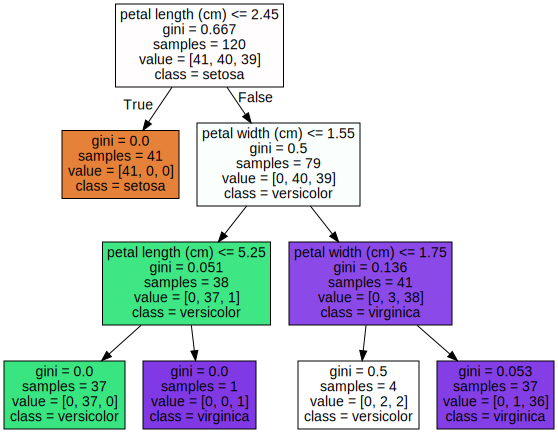

In [8]:
#parameter tuning: max_depth
parameter_test(max_depth=3)

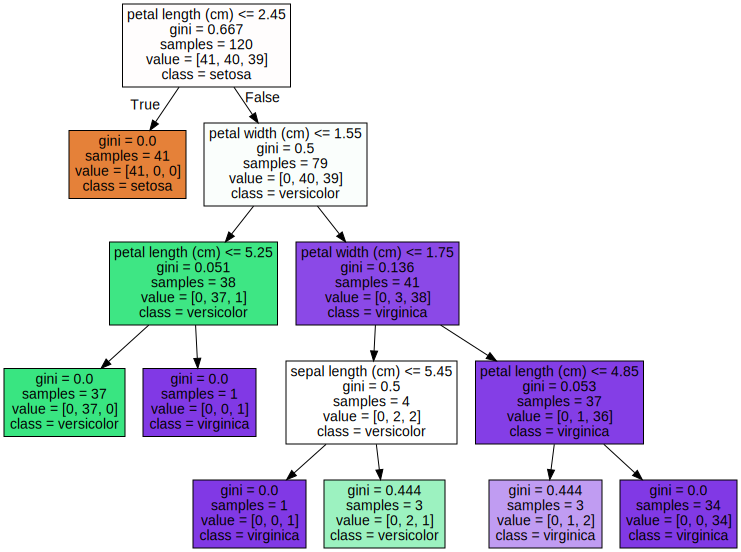

In [9]:
#parameter tuning: min_samples_split
parameter_test(min_samples_split=4)

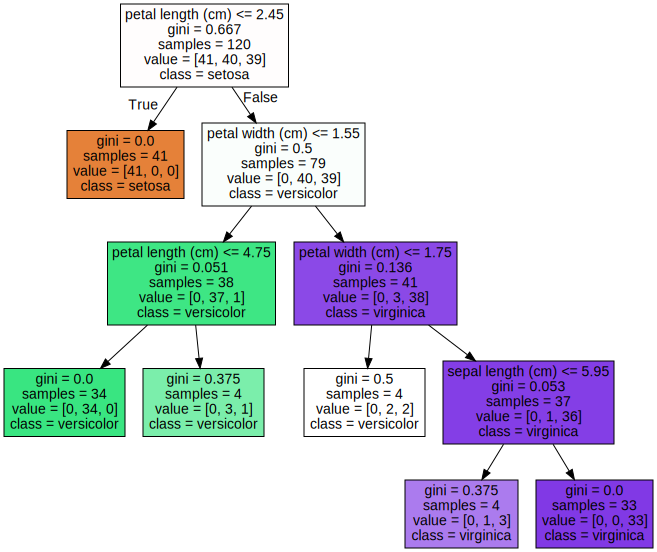

In [10]:
parameter_test(min_samples_leaf=4)

### DT Feature Importance

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm): 0.025
sepal width (cm): 0.000
petal length (cm): 0.555
petal width (cm): 0.420


<AxesSubplot:>

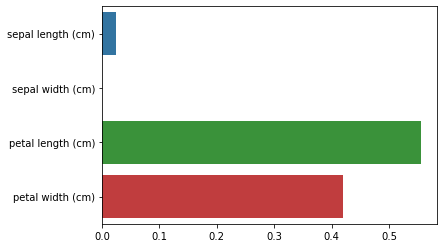

In [11]:
import seaborn as sns
import numpy as np
%matplotlib inline

print('Feature importances:')
print(np.round(dt_clf.feature_importances_, 3))

for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{}: {:.3f}'.format(name, value))

sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

### Overfitting in DecisionTree

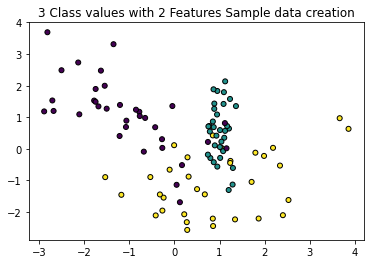

In [15]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

X_features, Y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=Y_labels, s=25, edgecolor='k')

In [20]:
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

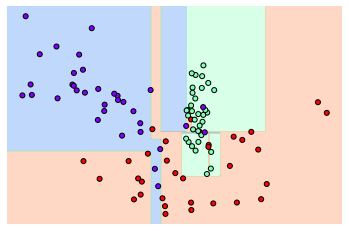

In [21]:
dt_clf = DecisionTreeClassifier().fit(X_features, Y_labels)
visualize_boundary(dt_clf, X_features, Y_labels)

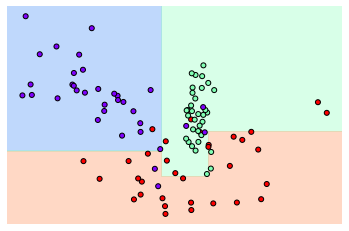

In [22]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, Y_labels)
visualize_boundary(dt_clf, X_features, Y_labels)

### Practice DT! - by Human Activity Recognition Dataset